## **Tony R Jacob**
## **Linear Regression**
In this task, we have a continuous dependent variable, so we have to go with the regression we will see how the machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In simple linear regression we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Importing the data from the link
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Checking for any null values in the data
data.isnull().any()

Hours     False
Scores    False
dtype: bool

# Data Visualisation
Now we can plot these two variables,inorder to find the relationship between them

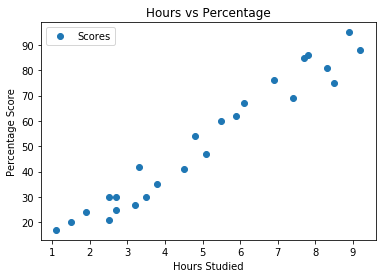

In [5]:
# Plotting the Hours vs Scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph it is clear that Hours and Scores has a positive linear relation

# Data Validation
We are going to divide entire data into Train and Test datasets.

In [6]:
# We have to extract the dependent and ibdependent variables alone from the full data sets
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values 

In [7]:
#Now that we have our Dependent and Independent variables,the next step is to split this data into training and test sets with 80% and 20%.
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

# Model Building
Now we are going to build the Simple linear regression model on the Training data set.

In [8]:
from sklearn.linear_model import LinearRegression  
Model = LinearRegression()  
Model.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_train, Model.predict(X_train))
print('R_Square=',r2)
n =len(X_train)
r2_adj =1- (1-r2)*(n-1)/(n-(13+1))
print('Adjusted_R_Square=',r2_adj)

R_Square= 0.9515510725211552
Adjusted_R_Square= 0.8465783963169915


The simple linear regression gives the out puts, the adjusted r square value is 0.846. That is 84.6%
of the variation in Score can be explained by the independent variable Hours.

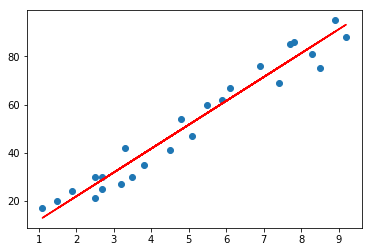

In [12]:
# Plotting the regression line
line = Model.coef_*X+Model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line,color='r');
plt.show()

In [26]:
# Making predictions
Y_pred = Model.predict(X_test) 
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [27]:
# Actual vs Predicted
Table = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
Table

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [31]:
# We can put the independent variable into the model and find the predicted value
hours = 9.25
Predicted_score = Model.predict(hours)
print("If a student studies for 9.25 hrs/ day = {}".format(hours))
print("Then the Predicted Score = {}".format(Predicted_score[0]))

If a student studies for 9.25 hrs/ day = 9.25
Then the Predicted Score = 93.69173248737539


# Model Accuracy

On the basis of Mean Absolute Error, we can say the model is how much accurate or how much better when comparing with the other models.

In [33]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002982
